Suicide or death by natural cause !?

Let’s say you are working for psychocriminology section of Vancouver police department.The department received a call and someone claimed that he found a dead student in his apartment. Autopsy results would not be released by next week, but for some reason the police needs to find out the cause of death earlier.Therefore, the department puts you in charge of an investigation to find out the probability that he committed a suicide or he died of a natural cause. You are required to use your magical artificial intelligence skills to reason based on some pieces of information that you managed to extract from his diary that you found on his study table.

You decided to to represent the possible situations that lead to his death with a few indicator variables (only can be true or false):

In [113]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt

# P(BU,RL,ES,NFF,DEP,FNP,PRS,CST,INS,SIL,PS,SU)

In [192]:
model = BayesianNetwork([('BU', 'ES'), ('RL', 'ES'),
                        ('ES', 'DEP'), ('NFF' ,'DEP'), 
                        ('FNP', 'CST'), ('PRS', 'CST'),('CST', 'INS'),
                        ('SIL', 'PS'),('DEP', 'SU'),('CST', 'SU'), ('PS', 'SU')])

In [193]:
#задим вереяности BU
cpd_BU =TabularCPD('BU', 2, [[0.2], [0.8]])

In [194]:
#задим вереяности RL
cpd_RL =TabularCPD('RL', 2, [[0.1], [0.9]])

In [195]:
#задим вереяности ES
cpd_ES =TabularCPD('ES', 2, [[0.85, 0.4, 0.6, 0.05],
                            [0.15, 0.6, 0.4, 0.95]], 
                   evidence=['BU', 'RL'],
                  evidence_card=[2, 2])

In [196]:
#задим вереяности NFF
cpd_NFF =TabularCPD('NFF', 2, [[0.5], [0.5]])
print(cpd_NFF)

+--------+-----+
| NFF(0) | 0.5 |
+--------+-----+
| NFF(1) | 0.5 |
+--------+-----+


In [197]:
#задим вереяности DEP
cpd_DEP =TabularCPD('DEP', 2, [[0.98, 0.75, 0.8, 0.1],
                            [0.02, 0.25, 0.2, 0.9]], 
                   evidence=['ES', 'NFF'],
                  evidence_card=[2, 2])
print(cpd_DEP)

+--------+--------+--------+--------+--------+
| ES     | ES(0)  | ES(0)  | ES(1)  | ES(1)  |
+--------+--------+--------+--------+--------+
| NFF    | NFF(0) | NFF(1) | NFF(0) | NFF(1) |
+--------+--------+--------+--------+--------+
| DEP(0) | 0.98   | 0.75   | 0.8    | 0.1    |
+--------+--------+--------+--------+--------+
| DEP(1) | 0.02   | 0.25   | 0.2    | 0.9    |
+--------+--------+--------+--------+--------+


In [198]:
#задим вереяности FNP
cpd_FNP =TabularCPD('FNP', 2, [[0.3], [0.7]])
print(cpd_FNP)

+--------+-----+
| FNP(0) | 0.3 |
+--------+-----+
| FNP(1) | 0.7 |
+--------+-----+


In [175]:
#задим вереяности PRS
cpd_PRS =TabularCPD('PRS', 2, [[0.3], [0.7]])


In [199]:
#задим вереяности DEP
cpd_CST =TabularCPD('CST', 2, [[0.95, 0.8, 0.6, 0.1],
                            [0.05, 0.2, 0.4, 0.9]], 
                   evidence=['FNP', 'PRS'],
                  evidence_card=[2, 2])
print(cpd_CST)

+--------+--------+--------+--------+--------+
| FNP    | FNP(0) | FNP(0) | FNP(1) | FNP(1) |
+--------+--------+--------+--------+--------+
| PRS    | PRS(0) | PRS(1) | PRS(0) | PRS(1) |
+--------+--------+--------+--------+--------+
| CST(0) | 0.95   | 0.8    | 0.6    | 0.1    |
+--------+--------+--------+--------+--------+
| CST(1) | 0.05   | 0.2    | 0.4    | 0.9    |
+--------+--------+--------+--------+--------+


In [191]:
cpd_INS =TabularCPD('INS', 2, [[0.95, 0.3],
                            [0.05, 0.7]], 
                   evidence=['CST'],
                  evidence_card=[2])
print(cpd_INS)

+--------+--------+--------+
| CST    | CST(0) | CST(1) |
+--------+--------+--------+
| INS(0) | 0.95   | 0.3    |
+--------+--------+--------+
| INS(1) | 0.05   | 0.7    |
+--------+--------+--------+


In [200]:
#задим вереяности SIL
cpd_SIL =TabularCPD('SIL', 2, [[0.2], [0.8]])


In [201]:
cpd_PS= TabularCPD('PS', 2, [[0.95, 0.2],[0.05, 0.8]],
                   evidence=['SIL'],
                   evidence_card=[2])
print(cpd_PS)


+-------+--------+--------+
| SIL   | SIL(0) | SIL(1) |
+-------+--------+--------+
| PS(0) | 0.95   | 0.2    |
+-------+--------+--------+
| PS(1) | 0.05   | 0.8    |
+-------+--------+--------+


In [125]:
#задим вереяности SU


In [202]:
cpd_SU =TabularCPD('SU',2 , [[0.8, 0.95, 0.65, 0.75, 0.3, 0.4, 0.02, 0.05],
                            [0.2, 0.05, 0.35, 0.25, 0.7, 0.6, 0.98, 0.95]], 
                   evidence=['DEP', 'CST', 'PS'],
                  evidence_card=[2, 2, 2])
print(cpd_SU)

+-------+--------+--------+--------+-----+--------+--------+--------+
| DEP   | DEP(0) | DEP(0) | DEP(0) | ... | DEP(1) | DEP(1) | DEP(1) |
+-------+--------+--------+--------+-----+--------+--------+--------+
| CST   | CST(0) | CST(0) | CST(1) | ... | CST(0) | CST(1) | CST(1) |
+-------+--------+--------+--------+-----+--------+--------+--------+
| PS    | PS(0)  | PS(1)  | PS(0)  | ... | PS(1)  | PS(0)  | PS(1)  |
+-------+--------+--------+--------+-----+--------+--------+--------+
| SU(0) | 0.8    | 0.95   | 0.65   | ... | 0.4    | 0.02   | 0.05   |
+-------+--------+--------+--------+-----+--------+--------+--------+
| SU(1) | 0.2    | 0.05   | 0.35   | ... | 0.6    | 0.98   | 0.95   |
+-------+--------+--------+--------+-----+--------+--------+--------+


In [203]:
# Associating the CPDs with the network structure.
model.add_cpds(cpd_BU, cpd_RL, cpd_ES, cpd_NFF, cpd_DEP, cpd_FNP, cpd_PRS, cpd_CST, cpd_INS, cpd_SIL, cpd_PS, cpd_SU)

In [204]:
model.check_model()

True

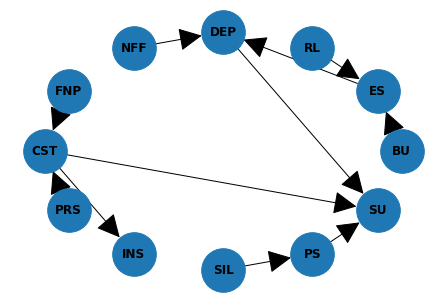

In [205]:
nx.draw_circular(model, with_labels=True, arrowsize=50, node_size=1900, font_weight="bold")
plt.show()